In [1]:
import os
import numpy as np
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras.preprocessing import image
from PIL import Image,ImageOps
import cv2
import matplotlib.pyplot as plt

In [2]:
img_rows, img_cols = 64 , 64

In [33]:
path='G:/Nazia/STRUCTURE/4 class classifier/Vertical Left/Validation Set'

In [3]:
isolated_train_path= 'E:/Crack Detection/4-class-classifier/Dataset/Binary/Train_Raw'
isolated_test_path= 'E:/Crack Detection/4-class-classifier/Dataset/Binary/Test_Raw'

In [5]:
for root, dirnames, filenames in os.walk(isolated_train_path):
    for filename in filenames:
        file_path = os.path.join(root, filename)
        img = Image.open(file_path)
        Grey = img.resize((img_rows, img_cols))
        #img = ImageOps.invert(img)
        #Grey = img.convert('L')
        #ret,thresh1 = cv.threshold(Grey,127,255,cv.THRESH_BINARY)
        #threshold = 105
        #Grey = Grey.point(lambda p: p < threshold and 255)
        #Grey = ImageOps.invert(img)
        Grey = Grey.convert('RGB')
        Grey.save(file_path)

In [5]:
train_data_dir = isolated_train_path
validation_data_dir = isolated_test_path

In [6]:
img_width, img_height, channel = img_rows, img_cols, 3
batch_size = 64

In [197]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [7]:
datagen = ImageDataGenerator(rescale=1./255)

#automatically retrive images and their classes for training and validation
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width,img_height),
        batch_size=batch_size,
        shuffle= True,
        class_mode ='categorical')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width,img_height),
        batch_size=batch_size,
        shuffle= False,
        class_mode ='categorical')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
IMG_SHAPE = img_cols, img_rows, 3
classes = 2

In [9]:
num_epoch = 30
num_train_samples = train_generator.samples
num_validation_samples = validation_generator.samples

print('num_train_samples: ' + str(num_train_samples))
print('num_validation_samples: ' + str(num_validation_samples))

num_train_samples: 8000
num_validation_samples: 2000


In [10]:
import tensorflow
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, BatchNormalization, ReLU, ELU, Dropout, Conv2D, Dense, MaxPool2D, AvgPool2D, GlobalAvgPool2D, Concatenate

In [ ]:
import tensorflow as tf
import tensorflow.keras

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json, Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

In [16]:
def entry_flow(inputs) :

    x = Conv2D(32, 3, strides = 2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(64,3,padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    previous_block_activation = x

    for size in [128, 256, 728] :

        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = Activation('relu')(x)
        x = SeparableConv2D(size, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = MaxPooling2D(3, strides=2, padding='same')(x)

        residual = Conv2D(size, 1, strides=2, padding='same')(previous_block_activation)

        x = tensorflow.keras.layers.Add()([x, residual])
        previous_block_activation = x

    return x

In [17]:
def middle_flow(x, num_blocks=8) :

    previous_block_activation = x

    for _ in range(num_blocks) :

        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = Activation('relu')(x)
        x = SeparableConv2D(728, 3, padding='same')(x)
        x = BatchNormalization()(x)

        x = tensorflow.keras.layers.Add()([x, previous_block_activation])
        previous_block_activation = x

    return x

In [18]:
def exit_flow(x) :

    previous_block_activation = x

    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)

    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x) 
    x = BatchNormalization()(x)

    x = MaxPooling2D(3, strides=2, padding='same')(x)

    residual = Conv2D(1024, 1, strides=2, padding='same')(previous_block_activation)
    x = tensorflow.keras.layers.Add()([x, residual])

    x = Activation('relu')(x)
    x = SeparableConv2D(728, 3, padding='same')(x)
    x = BatchNormalization()(x)

    x = Activation('relu')(x)
    x = SeparableConv2D(1024, 3, padding='same')(x)
    x = BatchNormalization()(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(classes, activation='softmax')(x)

    return x

In [19]:
inputs = Input(shape=(shape_x, shape_y, 1))
outputs = exit_flow(middle_flow(entry_flow(inputs)))
xception = Model(inputs, outputs)

In [22]:
xception.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 24)   3552        input_2[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 32, 32, 24)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 16, 16, 24)   0           dropout_1[0][0]                  
______________________________________________________________________________________________

In [23]:
opt = tensorflow.keras.optimizers.RMSprop()

In [24]:
xception.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [25]:
history_1= xception.fit_generator(train_generator,
                    steps_per_epoch=num_train_samples // batch_size,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=num_validation_samples // batch_size)

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
125/125 [==============================] - 82s 582ms/step - loss: 0.2113 - accuracy: 0.9310 - val_loss: 0.1701 - val_accuracy: 0.9325
Epoch 2/50
125/125 [==============================] - 65s 520ms/step - loss: 0.0268 - accuracy: 0.9912 - val_loss: 0.0869 - val_accuracy: 0.9642
Epoch 3/50
125/125 [==============================] - 65s 518ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0189 - val_accuracy: 0.9945
Epoch 4/50
125/125 [==============================] - 65s 521ms/step - loss: 0.0124 - accuracy: 0.9966 - val_loss: 0.0193 - val_accuracy: 0.9924
Epoch 5/50
125/125 [==============================] - 65s 519ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.2825 - val_accuracy: 0.8896
Epoch 6/50
125/125 [==============================] - 65s 519ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.0543 - val_accuracy: 0.9909
Epoch 7/50
125/125 [==============================] - 65s 518ms/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 4.5525 - val_ac

In [27]:
import seaborn as sns


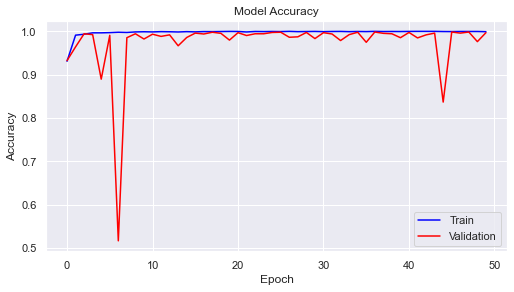

In [28]:
#  "Accuracy"
plt.figure(figsize=[8, 4])
sns.set_theme()
plt.plot(history_1.history['accuracy'], color="blue")
plt.plot(history_1.history['val_accuracy'] , color="red")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
#plt.show()
plt.gca().set_position([0.1, 0.12, 0.8, 0.8])
plt.savefig('E:/Crack Detection/4-class-classifier/Graph/TwoClass_accuracy_raw_1.svg')


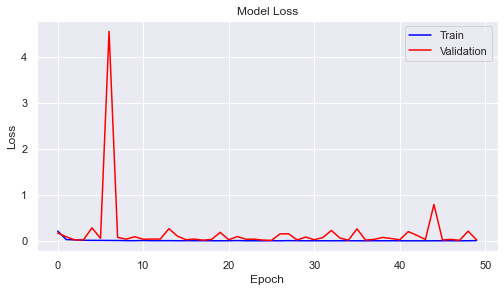

In [29]:
# "Loss"
plt.figure(figsize=[8, 4])
sns.set_theme()
plt.plot(history_1.history['loss'], color="blue")
plt.plot(history_1.history['val_loss'], color="red")
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
#plt.show()
plt.gca().set_position([0.1, 0.12, 0.8, 0.8])
plt.savefig('E:/Crack Detection/4-class-classifier/Graph/TwoClass_loss_raw_1.svg')
#plt.savefig('G:/Nazia/BanglaLekha/Comp-graph/Com_loss18.png')

In [30]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
batch_size=64

In [33]:
Y_pred = model.predict_generator(validation_generator, num_validation_samples// batch_size+1)
print(Y_pred.shape)
y_pred = np.argmax(Y_pred, axis=1)
y_true= validation_generator.classes

target_names = ['Cracked', 'Non-Cracked']
print(classification_report(y_true, y_pred, target_names=target_names))

(2000, 2)
              precision    recall  f1-score   support

     Cracked       1.00      0.99      1.00      1000
 Non-Cracked       0.99      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [34]:
cm = confusion_matrix(y_true, y_pred)

In [35]:
classes=2

In [38]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues
                         ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(12,12))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1]), ):
        plt.text(j, i, cm[i, j, ],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
    

In [42]:
import imp
imp.reload(sns)

<module 'seaborn' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>

In [44]:
sns.reset_defaults()

In [38]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.font_manager import FontProperties

# plt.figure() 
# prop = FontProperties()
# prop.set_file('Siyamrupali.ttf')

Confusion matrix, without normalization
[[ 994    6]
 [   0 1000]]


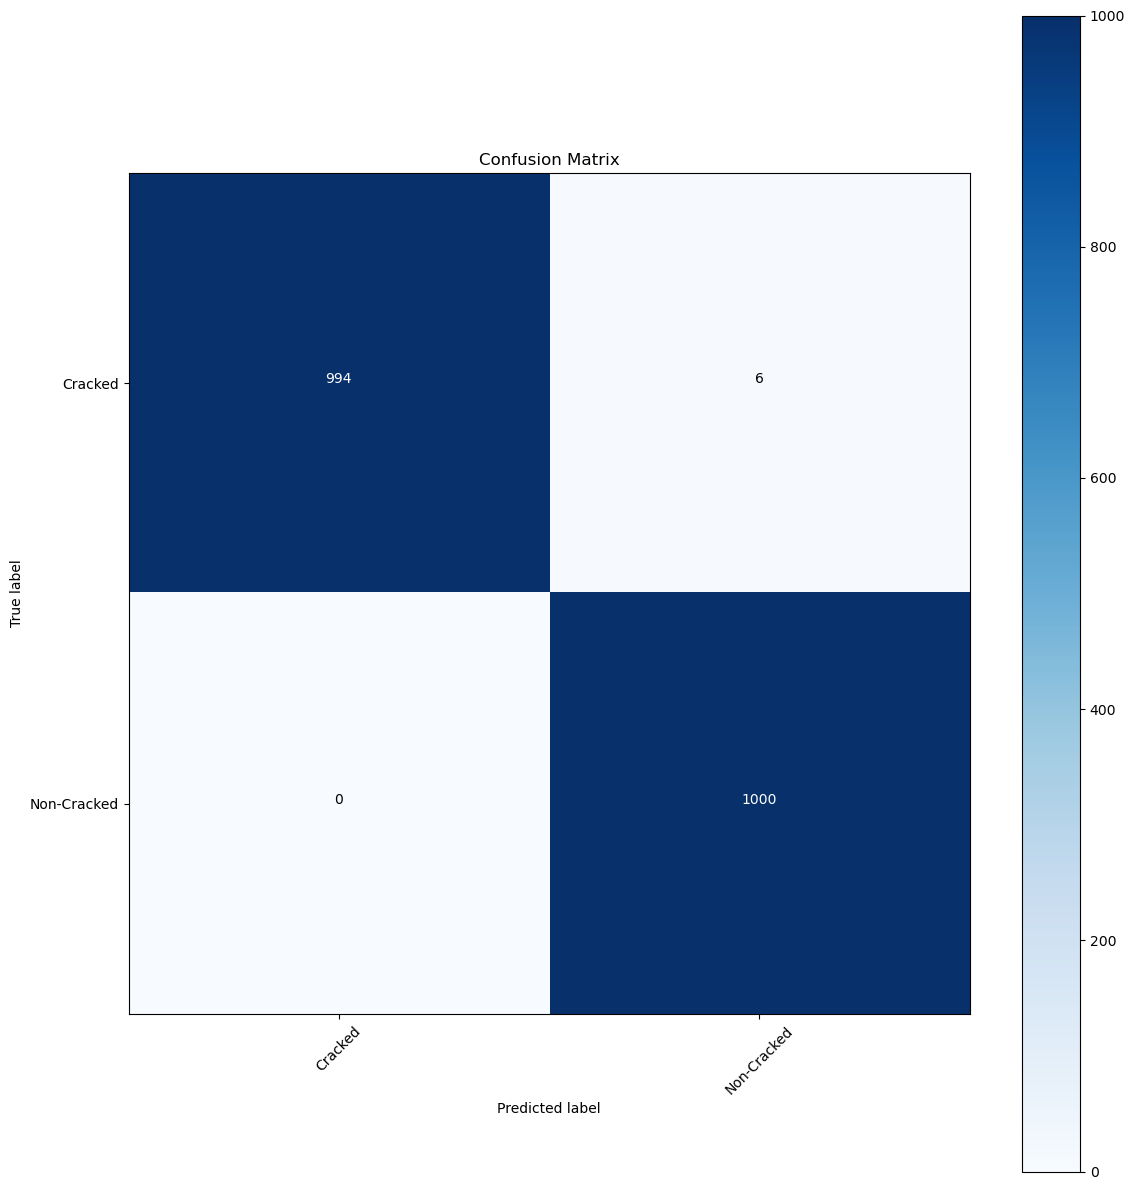

In [46]:
cm_plot_labels = ['Cracked', 'Non-Cracked']
#sns.set_theme()
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
plt.savefig('E:/Crack Detection/4-class-classifier/Graph/TwoClass_conf_Raw_1.svg')
#plt.savefig('G:/Nazia/BanglaLekha/Comp-graph/cf_val_git_05.png')

In [48]:
from math import ceil, floor

In [ ]:
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
y_true= validation_generator.classes
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81','82','83','84']
print(classification_report(y_true, y_pred, target_names=target_names, digits=2))

In [49]:
Y_pred = model.predict_generator(validation_generator, num_validation_samples// batch_size+1)
print(Y_pred.shape)
y_pred = np.argmax(Y_pred, axis=1)
y_true= validation_generator.classes

target_names = ['Cracked', 'Non-Cracked']
print(classification_report(y_true, y_pred, target_names=target_names, digits=3))

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


(2000, 2)
              precision    recall  f1-score   support

     Cracked      1.000     0.994     0.997      1000
 Non-Cracked      0.994     1.000     0.997      1000

    accuracy                          0.997      2000
   macro avg      0.997     0.997     0.997      2000
weighted avg      0.997     0.997     0.997      2000

